IMPORTING THE REQUIRED LIBRARIES, LOADING AND CLEANING THE DATA

In [228]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA #PCA will help to visualise our 10 dimesnional dataset in 2 dimensions 
import matplotlib.pyplot as plt
import time

dino=pd.read_csv("Clustering_Data.csv")

features=["Alcohol","Malic_Acid","Ash","Ash_Alcanity","Magnesium","Total_Phenols","Flavanoids","Nonflavanoid_Phenols","Proanthocyanins","Color_Intensity"]
cluster=["Customer_Segment"]

dino=dino.dropna(subset=features)
dinodata=dino[features].copy()

dinocluster=dino[cluster].copy()
dinoclusterarray = np.array(dinocluster,) 

SCALING THE DATA(on a scale of 1-10) TO ENSURE THAT NO ATTRIBUTE DOMINATES ANOTHER ATTRIBUTE IN THE CLUSTERING ALGO

In [229]:
dinodata = ((dinodata - dinodata.min()) / (dinodata.max() - dinodata.min())) * 9 + 1


INITIALIZING RANDOM CENTROIDS

In [230]:
def random_centroids(dinodata,k):
    centroids=[]
    for i in range (k):
        centroid=dinodata.apply(lambda x:float(x.sample())) 
        centroids.append(centroid)
    return pd.concat(centroids,axis=1)


FUNCTION TO FIND CLUSTER LABELS FOR EACH DATAPOINT

In [231]:
def get_labels(dinodata,centroids):
    distances=centroids.apply(lambda x:np.sqrt(((dinodata-x)**2).sum(axis=1)))
    return distances.idxmin(axis=1)
labels=get_labels(dinodata,centroids)



FUNCTION TO UPDATE CENTROID VALUES

In [232]:
def new_centroids(dinodata,labels,k):
    return dinodata.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

DEFINING A FUNCTION TO SHOW HOW THE CLUSTERS AND CENTROIDS CHANGE WITH EACH ITERATION BY PLOTTING GRAPHS

In [233]:

def plot_clusters(dinodata, labels, centroids, iteration):
    pca = PCA(n_components=2)
    dinodata_2d = pca.fit_transform(dinodata)
    centroids_2d = pca.transform(centroids.T)
    for i in range(iteration):
        time.sleep(0.5)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=dinodata_2d[:,0], y=dinodata_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1],c='r')
    plt.show()



FINAL ALGORITHM

C:\Users\Kavita Aparanji\AppData\Local\Temp\ipykernel_18680\4110391879.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid=dinodata.apply(lambda x:float(x.sample()))


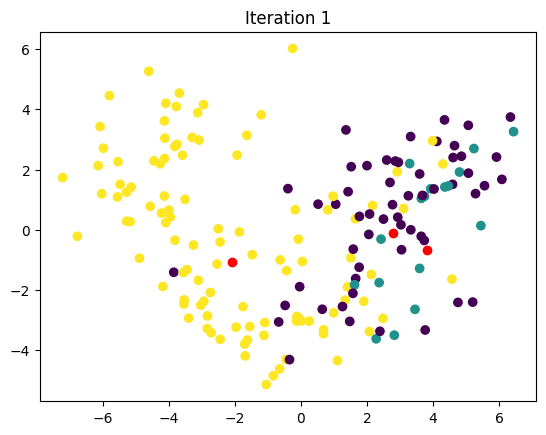

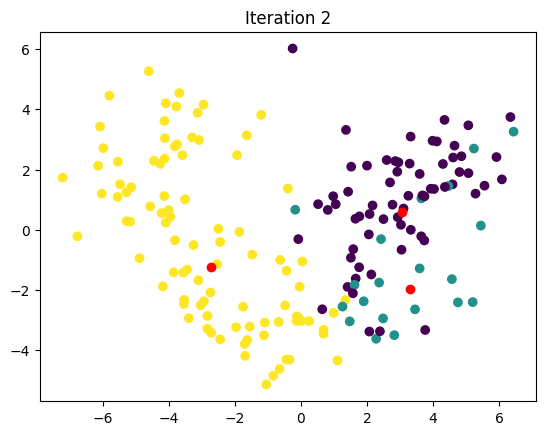

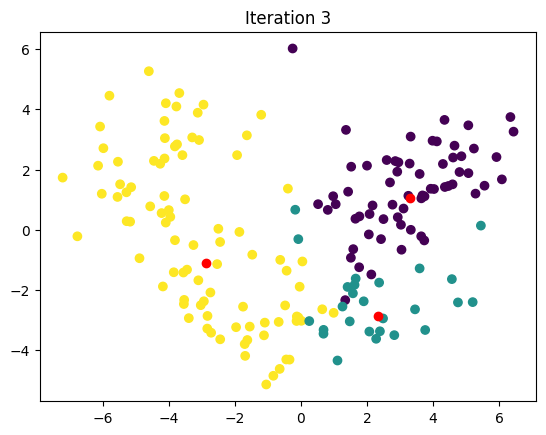

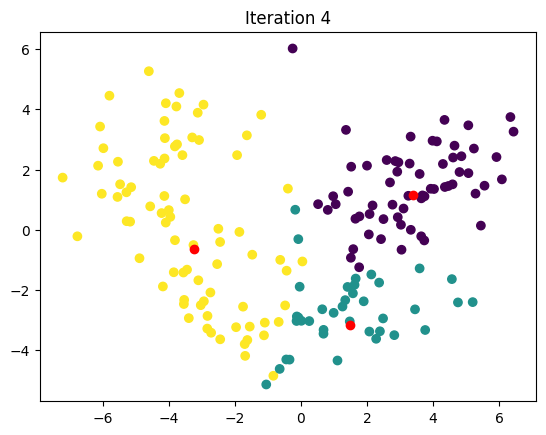

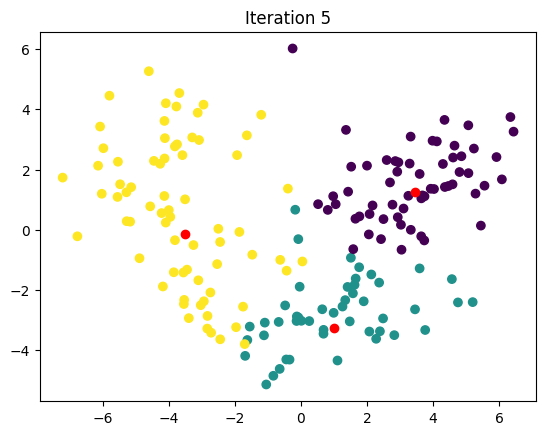

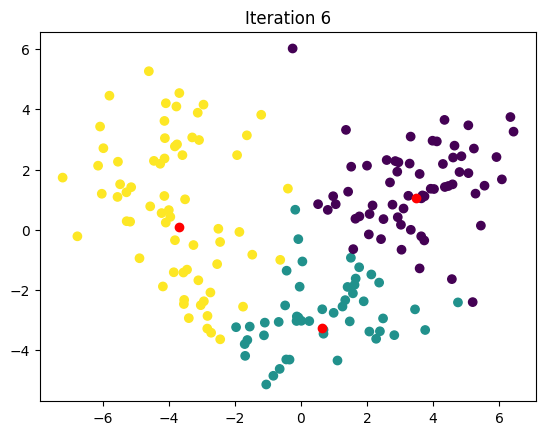

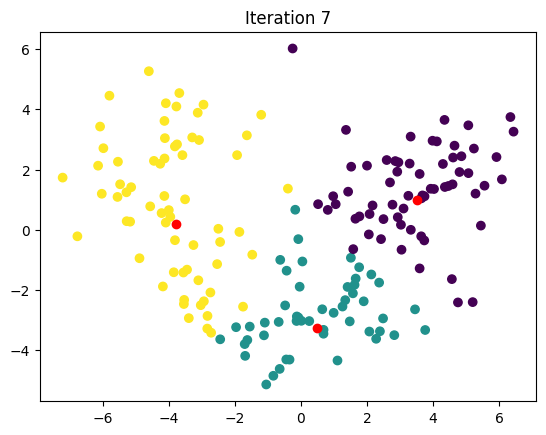

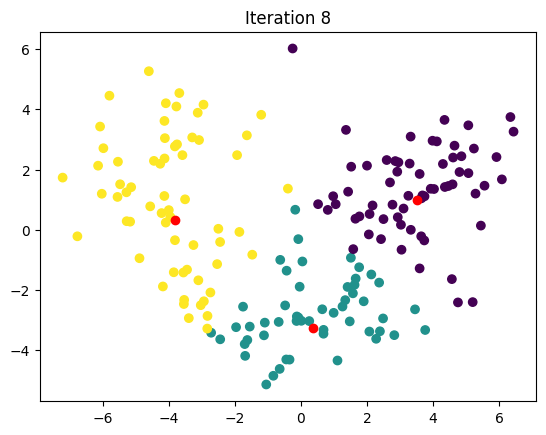

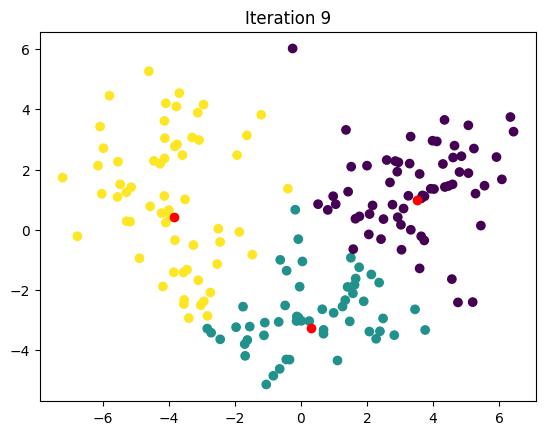

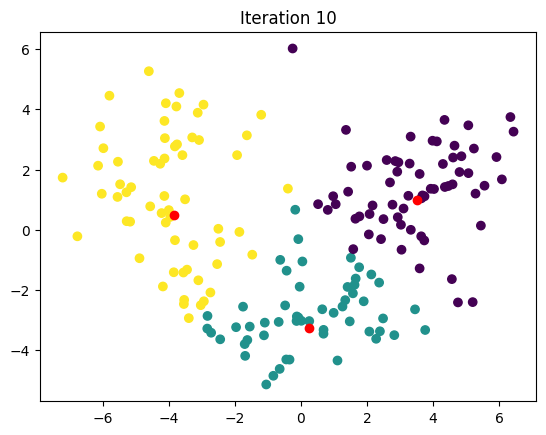

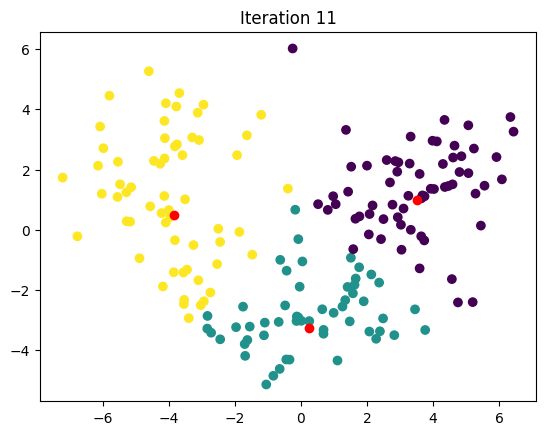

In [234]:
max_iterations = 100
k = 3

centroids = random_centroids(dinodata, k)
old_centroids = pd.DataFrame() #algorithm will stop iterating when old centroid==current centroid(clustering is done)
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(dinodata, centroids)
    centroids = new_centroids(dinodata, labels, k)
    plot_clusters(dinodata, labels, centroids, iteration)
    iteration += 1

CALCULATING THE ACCURACY OF THE CLUSTERS IDENTIFIED COMPARED TO THE CUSTOMER_SEGMENT COLUMN IN THE DATASET

In [235]:
labelsarray=np.array(labels+1,)
count=0
for i in range(0,178):
    if dinoclusterarray[i]==labelsarray[i]:
        count+=1
print("accuracy of my clustering model: ",(count*100)/177,"%")

accuracy of my clustering model:  85.87570621468926 %
